<h1><center>Project: Wrangling and Analyze Data - WeRateDogs</center></h1> 
<h2><center>Project 2 by Aaliyah Motala</center></h2>

## Table of Contents

<ul>

 <li><a href="#intro">Introduction</a></li>
 <li><a href="#gather">Data Gathering</a></li>
 <li><a href="#assess">Assessing Data</a></li>
 <li><a href="#clean">Cleaning Data</a></li>
  <li><a href="#store">Storing Data</a></li>
 <li><a href="#insights">Insights and Visualizations</a></li>
 
</ul>

<a id='intro'></a>
## Introduction
> The dataset that I would be wrangling and analyzing is the tweet archive of Twitter user <a href = "https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor" >@dog_rates</a>, also known as WeRateDogs. I will include comments into my code for you to understand why I'm writing the code and what it does. 
> More information is included in the ReadMe file (which I hope you read)

In [1]:
#Importing the various packages needed for this data

import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
import datetime as dt
import re
import matplotlib.pyplot as plt
%matplotlib inline

<a id='gather'></a>
## Data Gathering


1. Twitter Archive File (twitter-archive-enhanced.csv)

In [2]:
#Reading the twitter archive file 
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

#Checking if its there as well as column names
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Tweet Image Prediction file (image_predictions.tsv)

In [3]:
#Using request library to get image predictions file (link was provided)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

#a good response is 200
response = requests.get(url)
response

<Response [200]>

In [4]:
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

#Read the tsv file into a dataframe called df_images 
df_images = pd.read_csv('image_predictions.tsv', sep='\t', encoding = 'utf-8')   


#Checking the file 
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Twitter API (tweet_json.txt)

In [5]:
#You need these 4 codes from Twitter, create a developer account to get them.
#consumer is also know as api, don't get confused like me :) 

access_token = "346702552-V14Lp9lNQMa08eoSyDqZHn4wCizp2rbtwP4Jk4Ty"
access_secret = "6kNKMUckwcPCEIB0ch08HWpuv52tYTGCYjM95rv9ViDda"
consumer_key = "MaL6yk9xQOBlp42oaYlXdYD1o"
consumer_secret = "Tzx0HgtdnZzuOBOCbWX9xZjomdx4bUsFYCdmaGrwMZ1yeAYM0r"

#using the codes to request 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
            parser = tweepy.parsers.JSONParser(),
            wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:
#Array that store the received result
tweets = []

#Array storing any errors we have in receiving the tweets
errors = []

#Calculating time (this is important because it gives you an idea how long)
start = time.time()

#Using tweet_ID from df_archive to get the favs and retweets
for tweet_id in df_archive['tweet_id']:
    try:
        page = api.get_status(tweet_id, tweet_mode = 'extended')
        
        #getting the count of favourites/likes and retweets for each tweet ID
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        
        #saving this to the array
        tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                       })
    
    #Storing errors
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        errors.append(tweet_id)

# Calculate the time of excution
end = time.time()
print(end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856330835276025856 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851861385021730816 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code

In [7]:
#number of tweets
print(len(tweets))
#number of errors
print(len(errors))

2327
29


In [8]:
#We going to redo the errors to see if can get them.
#same code as above

#saving errors from the ones we retrying 
errors2 = []


for e in errors:
    try:
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        
        tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        })
        
    except Exception:
        print(str(tweet_id)+ " _ " + str(e))
        errors2.append(e)

In [9]:
print(len(tweets))

2356


In [10]:
#The tweet array increased in length so we did retrieve 
#tweets of some the previous errors.

In [11]:
#Saving to a dataframe
json_tweets = pd.DataFrame(tweets, columns = ['tweet_id', 'favorites', 'retweets'])

#saving to json txt
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

#Read the saved tweet_json.txt file
json_tweets = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [12]:
#checking if i have the data 
json_tweets.head()

,tweet_id,favorites,retweets
0,892420643555336193,33697,6968
1,892177421306343426,29217,5272
2,891815181378084864,21972,3464
3,891689557279858688,36778,7191
4,891327558926688256,35178,7715


<a id='assess'></a>
## Assessing Data
>In this section, I am detecting and documenting at quality issues and tidiness issues. I will be using visual assessment
programmatic assessement to assess the data.

### assessing df_archive (twitter_archive)

In [13]:
#checking first 5
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
#checking a random 5 rows for issues
df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1827,676430933382295552,NaN,NaN,2015-12-14 15:57:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Duke. He's an Urban Parmesan. They know h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676430933...,10,10,Duke,None,None,None,None
1483,693262851218264065,NaN,NaN,2016-01-30 02:41:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I hope you guys enjoy this beautiful snowy pup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693262851...,11,10,None,None,None,pupper,None
1990,672640509974827008,NaN,NaN,2015-12-04 04:56:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leonidas. He just got rekt by a snowba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672640509...,9,10,Leonidas,None,None,None,None
1769,678380236862578688,NaN,NaN,2015-12-20 01:03:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crumpet. He underestimated the snow. Q...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678380236...,10,10,Crumpet,None,None,None,None
506,812747805718642688,NaN,NaN,2016-12-24 19:52:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Sammy. At first I was like...,6.800555e+17,4.196984e+09,2015-12-24 16:00:30 +0000,https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,None,None,None,None


In [15]:
#more info about the df and it's dtypes
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
#checking for any duplicates
sum(df_archive.duplicated())

0

In [17]:
df_archive.expanded_urls.nunique()

2218

In [18]:
df_archive.shape

(2356, 17)

In [19]:
#checking denominator numbers
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
#checking numerator issues
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
#checking those tweets with above 15 numerator
df_archive[df_archive.rating_numerator > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


In [22]:
df_archive[df_archive.rating_denominator < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [23]:
df_archive[df_archive.rating_denominator > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [24]:
#checking the names
df_archive.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Tucker           10
Lola             10
Penny            10
Bo                9
Winston           9
the               8
Sadie             8
Daisy             7
an                7
Toby              7
Buddy             7
Bailey            7
Milo              6
Stanley           6
Dave              6
Oscar             6
Leo               6
Jack              6
Koda              6
Scout             6
Jax               6
Rusty             6
Bella             6
Finn              5
               ... 
Tater             1
Cilantro          1
Dallas            1
Sweet             1
Mary              1
Adele             1
Ralphson          1
Cora              1
Ralphie           1
Glenn             1
Crimson           1
Chloe             1
Butters           1
Tanner            1
Fwed              1
Mack              1
Dido              1
Edmund            1
Cleopatricia      1


In [25]:
#checking sources
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [26]:
#tweets that were replies and not rated tweets
sum(df_archive.in_reply_to_status_id.notnull())

78

In [27]:
#tweets that were retweets and not rated tweets
sum(df_archive.retweeted_status_id.notnull())

181

In [28]:
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### assessing df_images (image_prediction)

In [29]:
df_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
df_images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1764,826476773533745153,https://pbs.twimg.com/media/C3g8M0lWIAEcFgn.jpg,1,German_shepherd,0.741860,True,Tibetan_mastiff,0.122812,True,kelpie,0.100460,True
1246,747594051852075008,https://pbs.twimg.com/media/Cl_80k5WkAEbo9m.jpg,1,basenji,0.389136,True,dingo,0.270226,False,Chihuahua,0.098939,True
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
1060,715009755312439296,https://pbs.twimg.com/media/Cew5kyOWsAA8Y_o.jpg,1,dingo,0.310903,False,Chihuahua,0.142288,True,Cardigan,0.103945,True
547,677331501395156992,https://pbs.twimg.com/media/CWZdaGxXAAAjGjb.jpg,1,beagle,0.313464,True,boxer,0.218503,True,French_bulldog,0.106462,True


In [31]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
sum(df_images.duplicated())

0

### assessing json_tweets (txt)

In [33]:
json_tweets.head()

,tweet_id,favorites,retweets
0,892420643555336193,33697,6968
1,892177421306343426,29217,5272
2,891815181378084864,21972,3464
3,891689557279858688,36778,7191
4,891327558926688256,35178,7715


In [34]:
json_tweets.sample(5)

,tweet_id,favorites,retweets
2154,668989615043424256,593,288
894,756288534030475264,41057,16247
525,805932879469572096,7852,1794
69,879008229531029506,16719,2230
1774,676948236477857792,1951,771


In [35]:
json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id     2356 non-null int64
favorites    2356 non-null int64
retweets     2356 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [36]:
sum(json_tweets.duplicated())

29

### Quality issues
1. Dataset contains tweets that are replies and not the rated tweets.

2. The timestamp column is in string format and not in datetime format.

3. There are only 4 types of values in the source column, this can be simplified.

4. Dataset contains tweets that are retweets and not the rated tweets.

5. Some tweets have a denominator that isn't 10.

6. Many dog names are "none", "a" or "an"

7. The tweet_ID column should be string and not int format.

8. Tweets with missing images.

9. Keeping tweets thats a max 15 numerator.

### Tidiness issues
1. Having one column for the 4 stages of dogs.

2. Remove purposeless (for our analysis) rows such as "in reply to" and "retweeted status".

3. Combine Json_tweets with df_archive. 

4. Adding image_predictions into df_archive.

<a id='clean'></a>
## Cleaning Data
>In this section, I will clean all of the issues I documented while assessing (above). <br>
<br>
>I will make a copy of the original data before cleaning.

<ul>

 <li><a href="#quality">Quality</a></li>
 <li><a href="#tidy">Tidiness</a></li>
 
</ul>


In [37]:
# Make copies of original pieces of data 
#(so if i make a biiiig mistake, its going to be okay)

archive_clean = df_archive.copy()
images_clean = df_images.copy()
tweets_clean = json_tweets.copy()

<a id='quaility'></a>
### Quality

### Issue #1: Dataset contains tweets that are replies or retweets and not the original tweets.

#### Define: 1. Drop the rows that have values in the "in reply to" columns in df_archive

#### Code

In [38]:
#sum of the rows that have values aka not null 
#(they are replies and not rated tweets)

sum(archive_clean.in_reply_to_status_id.notnull())

78

In [39]:
#removing the rows by filtering for the rows that have NaN (no value)
#then making that filter the new archive_clean df

archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isna()]

#### Test

In [40]:
#checking if the "in reply to" changed
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: float64(4), int64(3), obje

In [41]:
#comparing to original df_archive dataframe
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> archive_clean has 0 in non-null in "in reply to" columns

### Issue #2: The timestamp column is in string format and not in datetime format.

#### Define : Change the data type of the timestamp column in df_archive to a date time format

#### Code

In [42]:
#Checking the timestamp column again (so we dont scroll)
archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [43]:
#changing the string to datetime (this package was called in the start)
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [44]:
#checking if it changed (it did)
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: datetime64[ns](1),

In [45]:
#timestamp column still looks the same, great.
archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


> We can see the data type changed to date time and the timestamp column stayed the same

### Issue #3: There are only 4 types of values in the source column, this can be simplified

#### Define : Simplify all the sources in the source column to something easily readable

#### Code: 

In [46]:
#I'm taking the url and replacing it with the last part of the url that 
#describes the url such as Vine etc.
archive_clean['source'] = archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
archive_clean['source'] = archive_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
archive_clean['source'] = archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
archive_clean['source'] = archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### Test: 

In [47]:
#checking to see if it changed
archive_clean.source.value_counts()

Twitter for iPhone    2143
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

> Issue resolved. The 4 sources are now readable

### Issue #4: Remove the retweeted tweets

#### Define: Remove rows that are retweets by dropping rows that have values in the "retweeted_status_id" column

#### Code: 

In [48]:
#the number of rows that are retweets and not rated tweets
sum(archive_clean.retweeted_status_id.notnull())

181

In [49]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()]

#### Test:

In [50]:
sum(archive_clean.retweeted_status_id.notnull())

0

In [51]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

In [52]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> the retweets are now deleted as you can see from the comparison of the clean dataset and the orginal dataset in "retweeted status id" column 

### Issue #5: Some tweets have a denominator that isn't 10.

#### Define: We need ratings out of 10. Some rows have ratings other than 10 and need to be dropped. First I'll change the incorrect ratings that do have correct ratings in the text.

#### Code:

In [53]:
archive_clean.query("rating_denominator != 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,Twitter for iPhone,The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None


In [54]:
#changing the values by replacing them
archive_clean['rating_numerator'] = np.where((archive_clean['tweet_id'] == 740373189193256964) & (archive_clean['rating_numerator'] == 9), 14, archive_clean['rating_numerator'])
archive_clean['rating_denominator'] = np.where((archive_clean['tweet_id'] == 740373189193256964) & (archive_clean['rating_denominator'] == 11), 10, archive_clean['rating_denominator'])

In [55]:
#checking the index (use loc instead of iloc when index isnt in correct position)
archive_clean.loc[[1068]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None


In [56]:
#changing the values by replacing them
archive_clean['rating_numerator'] = np.where((archive_clean['tweet_id'] == 722974582966214656) & (archive_clean['rating_numerator'] == 4), 13, archive_clean['rating_numerator'])
archive_clean['rating_denominator'] = np.where((archive_clean['tweet_id'] == 722974582966214656) & (archive_clean['rating_denominator'] == 20), 10, archive_clean['rating_denominator'])

In [57]:
archive_clean.loc[[1165]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,13,10,None,None,None,None,None


In [58]:
archive_clean['rating_numerator'] = np.where((archive_clean['tweet_id'] == 716439118184652801) & (archive_clean['rating_numerator'] == 50), 11, archive_clean['rating_numerator'])
archive_clean['rating_denominator'] = np.where((archive_clean['tweet_id'] == 716439118184652801) & (archive_clean['rating_denominator'] == 50), 10, archive_clean['rating_denominator'])

In [59]:
archive_clean.loc[[1202]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,None,None,None,None


In [60]:
#changing the values by replacing them
archive_clean['rating_numerator'] = np.where((archive_clean['tweet_id'] == 682962037429899265) & (archive_clean['rating_numerator'] == 7), 10, archive_clean['rating_numerator'])
archive_clean['rating_denominator'] = np.where((archive_clean['tweet_id'] == 682962037429899265) & (archive_clean['rating_denominator'] == 11), 10, archive_clean['rating_denominator'])

In [61]:
archive_clean.loc[[1662]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,None,None,None,None


In [62]:
#changing the values by replacing them
archive_clean['rating_numerator'] = np.where((archive_clean['tweet_id'] == 666287406224695296) & (archive_clean['rating_numerator'] == 1), 9, archive_clean['rating_numerator'])
archive_clean['rating_denominator'] = np.where((archive_clean['tweet_id'] == 666287406224695296) & (archive_clean['rating_denominator'] == 2), 10, archive_clean['rating_denominator'])

In [63]:
archive_clean.loc[[2335]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,9,10,an,None,None,None,None


In [64]:
#keeping all the rows where denominator is 10, others are dropped by filtering
archive_clean = archive_clean[archive_clean.rating_denominator == 10]

#### Test:

In [65]:
#checking if theres any rows besides 10
archive_clean.rating_denominator.value_counts()

10    2085
Name: rating_denominator, dtype: int64

### Issue #6: Many dog names are "none", "a" or "an"

#### Define: Trying to get as many dog names as we can to replace 'none', 'a' and 'an'

#### Code:

In [66]:
new_names = []

#I am assuming that the names begin with a capital letter (it makes sense)

for text in archive_clean['text']:
    
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        new_names.append(text.split()[2].strip(',').strip('.'))
    
    elif text.startswith('Here is ') and re.match(r'[A-Z].*', text.split()[2]):
        new_names.append(text.split()[2].strip(',').strip('.'))
        
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        new_names.append(text.split()[1].strip(',').strip('.'))
        
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        new_names.append(text.split()[3].strip(',').strip('.'))
        
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        new_names.append(text.split()[3].strip(',').strip('.')) 
        
    #No name picked up? None
    else:
        new_names.append('None')

In [67]:
#changing the names coloumn with new names extracted
archive_clean['name'] = new_names

#### Test:

In [68]:
#checking the difference in archive copy
archive_clean['name'].value_counts()

None         697
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Winston        8
Sadie          8
Lola           8
Daisy          7
Jax            6
Bo             6
Oscar          6
Koda           6
Bailey         6
Toby           6
Bella          6
Stanley        6
Louis          5
Buddy          5
Bentley        5
Rusty          5
Dave           5
Scout          5
Chester        5
Milo           5
Leo            5
Larry          4
Jeffrey        4
            ... 
Tuco           1
Patch          1
Covach         1
Harnold        1
Bookstore      1
Chompsky       1
Shikha         1
Jockson        1
Howie          1
Ed             1
Mutt           1
Eevee          1
Sid            1
Dutch          1
Pancake        1
Crouton        1
Nollie         1
Mojo           1
Remy           1
Opie           1
Ginger         1
Kevon          1
Caryl          1
Monkey         1
Pluto          1
Blipson        1
Dot            1
Humphrey      

In [69]:
#checking orginal names in orginal archive df
df_archive['name'].value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Tucker           10
Lola             10
Penny            10
Bo                9
Winston           9
the               8
Sadie             8
Daisy             7
an                7
Toby              7
Buddy             7
Bailey            7
Milo              6
Stanley           6
Dave              6
Oscar             6
Leo               6
Jack              6
Koda              6
Scout             6
Jax               6
Rusty             6
Bella             6
Finn              5
               ... 
Tater             1
Cilantro          1
Dallas            1
Sweet             1
Mary              1
Adele             1
Ralphson          1
Cora              1
Ralphie           1
Glenn             1
Crimson           1
Chloe             1
Butters           1
Tanner            1
Fwed              1
Mack              1
Dido              1
Edmund            1
Cleopatricia      1


> 48 unknown names were found

### Issue #7: The tweet_ID column should be string and not int format.

#### Define: Use ints when we will be manipulating the variables. Since this is an ID column, we should convert to string

#### Code:

In [70]:
#checking archive copy dtype
archive_clean['tweet_id'].dtype

dtype('int64')

In [71]:
#checking original dtype
df_archive['tweet_id'].dtype

dtype('int64')

In [72]:
#changing from int to string
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

#### Test: 

In [73]:
#dtype changed to str 
archive_clean['tweet_id'].dtype

dtype('O')

> dtype('O') means its a object datatype aka string

### Issue #8: Tweets with missing images.

#### Define: We are focused on tweets with images, all tweets without images must be removed. This is the expanded_url column

#### Code:

In [74]:
#checking how many tweets dont have images
sum(archive_clean['expanded_urls'].isnull())

3

In [75]:
#dropping those tweets with no images
archive_clean = archive_clean.dropna(subset=['expanded_urls'])

#### Test:

In [76]:
#checking how many tweets dont have images
sum(archive_clean['expanded_urls'].isnull())

0

> Great, no tweets without images

### Issue #9: Keeping tweets thats a max 15 numerator

#### Define: There are some large numerators which are outliers and need to be removed for analysis

#### Code:

In [77]:
#checking whats over 15 rating
archive_clean.query("rating_numerator > 15")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


In [78]:
#checking dtype since some ratings are float
archive_clean['rating_numerator'].dtype

dtype('int64')

In [79]:
#changing dtype to float so we can add the decimals
archive_clean['rating_numerator'] = archive_clean['rating_numerator'].astype(float)

In [80]:
#dtype changes, yay. small victories.
archive_clean['rating_numerator'].dtype

dtype('float64')

In [81]:
#tweet_id is now in "" because its a string now 
#changing to correct numerators
archive_clean['rating_numerator'] = np.where((archive_clean['tweet_id'] == "786709082849828864") & (archive_clean['rating_numerator'] == 75), 9.75, archive_clean['rating_numerator'])
archive_clean['rating_numerator'] = np.where((archive_clean['tweet_id'] == "778027034220126208") & (archive_clean['rating_numerator'] == 27.0), 11.27, archive_clean['rating_numerator'])

In [82]:
#checking if it changed
archive_clean.query("rating_numerator > 15")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26.0,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420.0,10,None,None,None,None,None


In [83]:
#drop all rows above >15 by filtering
archive_clean = archive_clean[archive_clean.rating_numerator < 15]

#### Test: 

In [84]:
#testing testing 1 2 3
archive_clean.query("rating_numerator < 15")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,doggo,None,None,None


> everything seems in order, no tweets over 15 rating

<a id='tidy'></a>
### Tidiness

#### Issue #1: Having one column for the 4 stages of dogs.

#### Define: having 4 columns for different stages is unneccessary and can be compiled into 1 column.

#### Code:

In [85]:
#creating a column for the dog stages
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

In [86]:
#So many nones its a ministry, lets remove that
archive_clean['dog_stage'].value_counts()

NoneNoneNoneNone        1744
NoneNonepupperNone       220
doggoNoneNoneNone         72
NoneNoneNonepuppo         23
NoneflooferNoneNone        9
doggoNonepupperNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [87]:
#replacing nones with nothing
archive_clean.doggo.replace('None', '', inplace = True)
archive_clean.floofer.replace('None', '', inplace = True)
archive_clean.pupper.replace('None', '', inplace = True)
archive_clean.puppo.replace('None', '', inplace = True)

In [88]:
#rerun this
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

In [89]:
#nones are now removed
#we have pictures/ tweets with 2 dog stages
archive_clean['dog_stage'].value_counts()

                1744
pupper           220
doggo             72
puppo             23
doggopupper        9
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [90]:
#Lets make it look neater and just use the first word 

archive_clean.loc[archive_clean.dog_stage=='doggopupper','dog_stage']='doggo'
archive_clean.loc[archive_clean.dog_stage=='doggofloofer','dog_stage']='doggo'
archive_clean.loc[archive_clean.dog_stage=='doggopuppo','dog_stage']='doggo'

In [91]:
#checking if it changed
archive_clean['dog_stage'].value_counts()

           1744
pupper      220
doggo        83
puppo        23
floofer       9
Name: dog_stage, dtype: int64

In [92]:
#bringing nones back to the dog stage column
archive_clean['dog_stage'].replace('', 'None', inplace = True)

In [93]:
#it worked!
archive_clean['dog_stage'].value_counts()

None       1744
pupper      220
doggo        83
puppo        23
floofer       9
Name: dog_stage, dtype: int64

#### Test:

In [94]:
#dog stage is there!
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,,,,,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,,,,,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,,,,,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,,,,,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,,,,,None


#### Issue #2: Remove purposeless (for our analysis) rows such as "in reply to" and "retweeted status" etc.

#### Define: Theres alot of empty columns such as the 4 dog stages and in reply to etc and we need to remove them to make this look much cleaner

#### Code:

In [95]:
#looking at columns
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2079 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2079 non-null datetime64[ns]
source                        2079 non-null object
text                          2079 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2079 non-null object
rating_numerator              2079 non-null float64
rating_denominator            2079 non-null int64
name                          2079 non-null object
doggo                         2079 non-null object
floofer                       2079 non-null object
pupper                        2079 non-null object
puppo                         2079 non-null object
dog_stage                    

In [96]:
#dropping columns (dont forget to override df)
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test:

In [97]:
#success
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2079 non-null object
timestamp             2079 non-null datetime64[ns]
source                2079 non-null object
text                  2079 non-null object
expanded_urls         2079 non-null object
rating_numerator      2079 non-null float64
rating_denominator    2079 non-null int64
name                  2079 non-null object
dog_stage             2079 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 162.4+ KB


### Issue 3: Combine Json_tweets with df_archive 

#### Define: Combining the retweets and favorites with archive_clean so we can analyse the tweets better

#### Code:

In [98]:
#checking tweet_id type
tweets_clean['tweet_id'].dtype

dtype('int64')

In [99]:
#change to string to match the tweet_id in archive_clean
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype(str)

In [100]:
#merging
archive_clean = pd.merge(archive_clean, tweets_clean, on = 'tweet_id', how = 'left')

#### Test:

In [101]:
#checking if it merged, it did
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2107
Data columns (total 11 columns):
tweet_id              2108 non-null object
timestamp             2108 non-null datetime64[ns]
source                2108 non-null object
text                  2108 non-null object
expanded_urls         2108 non-null object
rating_numerator      2108 non-null float64
rating_denominator    2108 non-null int64
name                  2108 non-null object
dog_stage             2108 non-null object
favorites             2100 non-null float64
retweets              2100 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 197.6+ KB


### Issue 4: Adding images_predictions to df_archive

#### Define: I wil merge the two dataframes so we can analyze the data better. However, I will create 1 column for dog breeds by taking the highest confidence intervel

#### Code:

In [102]:
images_clean['tweet_id'].dtype

dtype('int64')

In [103]:
#change to string to match the tweet_id in archive_clean
images_clean['tweet_id'] = images_clean['tweet_id'].astype(str)

In [104]:
archive_clean = pd.merge(archive_clean, images_clean, on = 'tweet_id', how = 'left')

In [105]:
#first its an array to store the dog breed 
dog_breed = []

#array to store the Confidence level 
confidence_level = []

# Get_prediction_confidence function:
# search the first true algorithm and append it to a list with it's level of confidence
# if flase prediction_algorthm will have a value of NaN
def get_prediction_confidence(df):
    if df['p1_dog'] == True:
        dog_breed.append(df['p1'])
        confidence_level.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        dog_breed.append(df['p2'])
        confidence_level.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        dog_breed.append(df['p3'])
        confidence_level.append(df['p3_conf'])
    else:
        dog_breed.append('NaN')
        confidence_level.append(0)

archive_clean.apply(get_prediction_confidence, axis=1)
archive_clean['dog_breed'] = dog_breed
archive_clean['confidence_level'] = confidence_level


In [106]:
# checking if its there...
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2107
Data columns (total 24 columns):
tweet_id              2108 non-null object
timestamp             2108 non-null datetime64[ns]
source                2108 non-null object
text                  2108 non-null object
expanded_urls         2108 non-null object
rating_numerator      2108 non-null float64
rating_denominator    2108 non-null int64
name                  2108 non-null object
dog_stage             2108 non-null object
favorites             2100 non-null float64
retweets              2100 non-null float64
jpg_url               1985 non-null object
img_num               1985 non-null float64
p1                    1985 non-null object
p1_conf               1985 non-null float64
p1_dog                1985 non-null object
p2                    1985 non-null object
p2_conf               1985 non-null float64
p2_dog                1985 non-null object
p3                    1985 non-null object
p3_conf             

In [107]:
#dropping unneccessary columns
archive_clean = archive_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

#### Test:

In [108]:
#checking if its dropped
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2107
Data columns (total 14 columns):
tweet_id              2108 non-null object
timestamp             2108 non-null datetime64[ns]
source                2108 non-null object
text                  2108 non-null object
expanded_urls         2108 non-null object
rating_numerator      2108 non-null float64
rating_denominator    2108 non-null int64
name                  2108 non-null object
dog_stage             2108 non-null object
favorites             2100 non-null float64
retweets              2100 non-null float64
jpg_url               1985 non-null object
dog_breed             2108 non-null object
confidence_level      2108 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 247.0+ KB


In [109]:
archive_clean['dog_breed'].value_counts()

NaN                               425
golden_retriever                  154
Labrador_retriever                103
Pembroke                           94
Chihuahua                          90
pug                                62
toy_poodle                         50
chow                               47
Samoyed                            42
Pomeranian                         41
malamute                           33
Welsh_springer_spaniel             33
French_bulldog                     31
Chesapeake_Bay_retriever           31
cocker_spaniel                     30
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Cardigan                           21
Staffordshire_bullterrier          20
Shih-Tzu                           20
beagle                             20
Siberian_husky                     20
Maltese_dog                        19
Rottweiler                         18
Shetland_sheepdog                  18
Italian_grey

<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [110]:
archive_clean.to_csv('twitter_archive_master.csv', index = False)

<a id='insights'></a>
## Analyzing and Visualizing Data
In this section, I will analyze and visualize your wrangled data.

In [111]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [112]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,jpg_url,dog_breed,confidence_level
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,33697.0,6968.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,29217.0,5272.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,21972.0,3464.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,36778.0,7191.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,35178.0,7715.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


## Insights and Visualization

### 1. This is to see how the ratings are distributed amongst the tweets.##

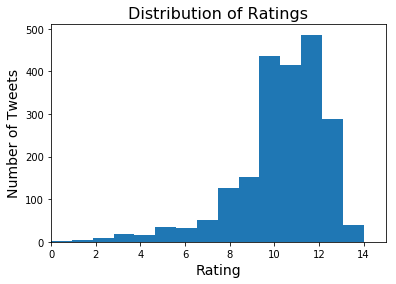

In [113]:
twitter_archive_master['rating_numerator'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.show();

> We can see that there are more 9 to 12 ratings on dogs. The distribution is left skewed. 15/10 was considered to be the highest rating and very rarely given as we can see.

### 2. Percentage of different dog breeds used in tweets

In [114]:
#getting counts
twitter_archive_master['dog_stage'].value_counts()

None       1773
pupper      220
doggo        83
puppo        23
floofer       9
Name: dog_stage, dtype: int64

In [115]:
#getting total
total_d = twitter_archive_master['dog_stage'].count()

In [116]:
#getting totals for stages
total_none = (twitter_archive_master.query("dog_stage == 'None'")['text'].count())/total_d

total_pupper = (twitter_archive_master.query("dog_stage == 'pupper'")['text'].count())/total_d

total_doggo = (twitter_archive_master.query("dog_stage == 'doggo'")['text'].count())/total_d

total_puppo = (twitter_archive_master.query("dog_stage == 'puppo'")['text'].count())/total_d

total_floofer = (twitter_archive_master.query("dog_stage == 'floofer'")['text'].count())/total_d

Text(0.5,-0.01,'Percentage of dog stages used in tweets')

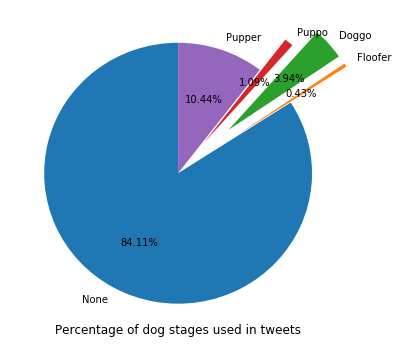

In [117]:
labels = 'None', 'Floofer', 'Doggo', 'Puppo', 'Pupper'
sizes = [total_none, total_floofer, total_doggo, total_puppo, total_pupper]
explode = (0, 0.5, 0.5, 0.3, 0)
plt.figure( figsize = (6,6))
plt.legend(title="Dog_stages")
plt.pie(sizes, explode=explode, labels=labels, autopct='%.2f%%', startangle=90)
plt.title("Percentage of dog stages used in tweets",y=-0.01)

#plotting pie for showing the percentage of dog breeds

> Although there are 4 dog stages, majority (84.12% actually!) do not have any dog stages to them. However, it seems that theres alot of pupper pics (10.43%) compared to the other 3 stages. 

### 3. Getting most common dog breeds 

In [118]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorites,retweets,jpg_url,dog_breed,confidence_level
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,None,33697.0,6968.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,None,29217.0,5272.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,None,21972.0,3464.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,None,36778.0,7191.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,None,35178.0,7715.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


Text(0.5,1,'Top 10 dog breeds in tweets')

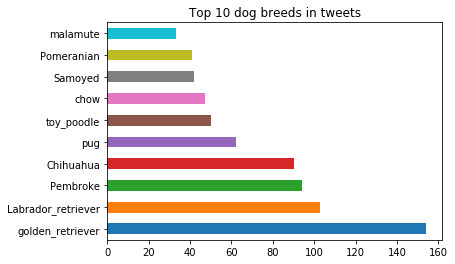

In [119]:
twitter_archive_master['dog_breed'].value_counts()[:10].plot(kind='barh')
plt.title("Top 10 dog breeds in tweets")

> Top 10 dog breeds are really interesting. The golden retriever being number 1 with over 150 tweets. This can be expected as it is a common friendly dog breed. Followed by Labrador retriever and pembroke in 2nd and 3rd. 

### 4. Retweet vs favorites and does it correlate

In [120]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 14 columns):
tweet_id              2108 non-null int64
timestamp             2108 non-null object
source                2108 non-null object
text                  2108 non-null object
expanded_urls         2108 non-null object
rating_numerator      2108 non-null float64
rating_denominator    2108 non-null int64
name                  2108 non-null object
dog_stage             2108 non-null object
favorites             2100 non-null float64
retweets              2100 non-null float64
jpg_url               1985 non-null object
dog_breed             1683 non-null object
confidence_level      2108 non-null float64
dtypes: float64(4), int64(2), object(8)
memory usage: 230.6+ KB


Text(0.5,1,'Favorites as a Function of Retweets')

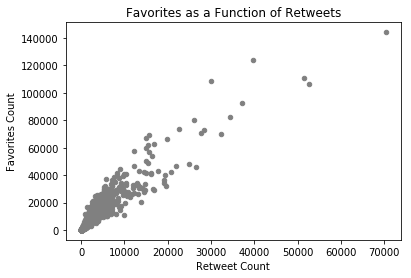

In [121]:
twitter_archive_master.plot(x= 'retweets', y = 'favorites', kind='scatter', color='grey')
plt.xlabel('Retweet Count')
plt.ylabel('Favorites Count')
plt.title('Favorites as a Function of Retweets')

> This is a correlation between favourites and retweets. There is a positive correlation and it can be expected. The more retweets a picture gets, the more audience it reaches and the more favourites and addtional retweets it can recieve.

## References
>1. How to use the twitter api: https://stackabuse.com/accessing-the-twitter-api-with-python/
>2. Reading and writing to a JSON file: https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
>3. Analyzing trumps tweets: https://morioh.com/p/dd71f1ed823d 
>4. Value_counts() and plot(): https://mode.com/python-tutorial/counting-and-plotting-in-python/

Thank you.